In [1]:
import os
import pandas as pd
import json
from collections import Counter
import seaborn as sns
from netpixi.integration.gt import *
from netpixi.integration.gt import Graph
from regression.integration.gt import *
import netpixi
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import cpnet
from graph_tool import spectral
import json
import regression as reg
from itertools import chain

import numpy as np
from collections import defaultdict
import itertools
g = Graph(directed=False)

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [2]:
df_sample = pd.read_csv('sample.csv')

In [3]:
import ast

# Converta as strings de volta para listas
df_sample['usernames'] = df_sample['usernames'].apply(ast.literal_eval)

In [4]:
df = df_sample.explode('usernames')
pivot_table = df.groupby(['usernames','product_name']).size().unstack(fill_value=0)
new_df_data = []
for _, row in pivot_table.iterrows():
    reviewed_products = row[row > 0].index.tolist()
    
    for product1, product2 in combinations(reviewed_products, 2):
        new_df_data.append((f"{product1}_{product2}", 1))

new_df = pd.DataFrame(new_df_data, columns=['product_pair', 'weight'])

new_df = new_df.groupby('product_pair').sum().reset_index()

df_novo_dataset = new_df.groupby('weight').size().reset_index(name='count')

df_filtrado = df_novo_dataset.loc[df_novo_dataset['weight'] < 26]
new_df = new_df.loc[new_df['weight'] >= 2]

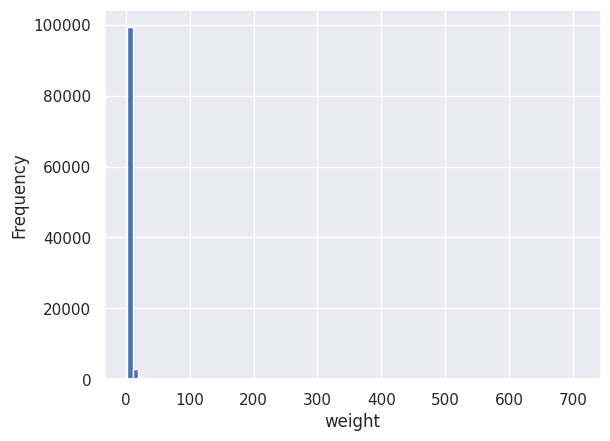

In [5]:
new_df["weight"].plot.hist(bins=80)
plt.xlabel("weight")
plt.show()

In [6]:
import csv
from collections import defaultdict
from itertools import combinations
from sklearn.preprocessing import LabelEncoder

username_counts = defaultdict(int)

for username, row in pivot_table.iterrows():
    if username in ['Anonymous', 'anonymous', 'ByAmazonCustomer', 'Amazon Customer']:
        continue

    reviewed_products = row[row > 0].index.tolist()

    username_counts[username] += len(reviewed_products)

data_dict = defaultdict(list)

for username, row in pivot_table.iterrows():

    reviewed_products = row[row > 0].index.tolist()

    for product1, product2 in combinations(reviewed_products, 2):
        data_dict[(product1, product2)].append(username)

new_df = pd.DataFrame(list(data_dict.items()), columns=['product_pair', 'usernames'])

new_df['weight'] = new_df['usernames'].apply(len)

new_df = new_df[new_df['weight'] >= 2]

product_encoder = LabelEncoder()

all_product_names = set([product for pair in new_df['product_pair'] for product in pair])

product_encoder.fit(list(all_product_names))

with open('edges.txt', 'w', newline='') as f:
    writer = csv.writer(f, delimiter='\t')
    for _, row in new_df.iterrows():
        product1, product2 = row['product_pair']
        encoded_product1 = product_encoder.transform([product1])[0]
        encoded_product2 = product_encoder.transform([product2])[0]
        writer.writerow([encoded_product1, encoded_product2])

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [7]:
new_df

,product_pair,usernames,weight
0,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), Ca...","["" · Review provided by staples.com, DAN · Re...",4
1,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), Ca...","["" · Review provided by staples.com, DAN · Re...",12
2,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), Ep...","["" · Review provided by staples.com, John]",2
3,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), HP...","["" · Review provided by staples.com, JOHN · R...",2
4,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), HP...","["" · Review provided by staples.com, MICHAEL]",2
...,...,...,...
442024,(Alpha 7 IV Full-frame Mirrorless Interchangea...,"[· Review provided by digitec.ch, · Review pr...",2
442025,(Alpha 7 IV Full-frame Mirrorless Interchangea...,"[· Review provided by digitec.ch, · Review pr...",2
442031,(Alpha 7 IV Full-frame Mirrorless Interchangea...,"[· Review provided by digitec.ch, · Review pr...",2
442042,"(Apple HomePod mini (Orange), PartyBox 310 Por...","[· Review provided by digitec.ch, ★★★★★]",2


In [8]:
f = open("edges.txt", "r")
x = f.readlines()

vertices = []
i = 0
while i <= len(x)-1:
    z = x[i].split('\t')
    y = z[1].strip('\n')
    if z[0] not in vertices:
        vertices.append(int(z[0]))
    if y not in vertices:
        vertices.append(int(y))
    if i%1000 == 0:
        print(i)
    i +=1
vertices = list(dict.fromkeys(vertices) )

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000


In [9]:
for v in vertices:
    g.add_vertex(v)
print('número de vértices de g:', g.num_vertices())

número de vértices de g: 1448


In [10]:
i = 0
while i <= len(x)-1:
    z = x[i].split('\t')
    y = int(z[1].strip('\n'))
    g.add_edge(int(z[0]), y)
    i +=1
    
print('número de arestas de g:', g.num_edges())

número de arestas de g: 103039


In [11]:
gt_save(g, 'products.net.gz')

In [12]:
g = gt_load('products.net.gz')

In [13]:
m = g.num_edges()
n = g.num_vertices()
print(f"Arestas = {m}")
print(f"Vertices = {n}")
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges
d = m / max_edges
print(f"Densidade = {d}")

Arestas = 103039
Vertices = 1448
Densidade = 0.09835456860641373


In [14]:
data = gt_data(g)
data

""
id
317
319
338
479
577
...
1383
944
335


In [15]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())
data['degree'] = degrees
data

,degree
id,
317,207
319,34
338,192
479,81
577,56
...,...
1383,2
944,1
335,1


count    1448.000000
mean      142.319061
std       176.023834
min         1.000000
25%        13.000000
50%        67.500000
75%       215.250000
max       968.000000
Name: degree, dtype: float64

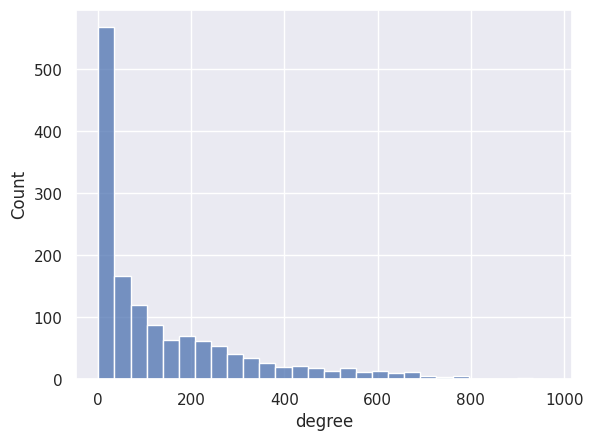

In [16]:
sns.histplot(data['degree'])
data['degree'].describe()

In [17]:
g = gt_load('products.net.gz')
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'exemplo.net.gz')

In [18]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'exemplo.net.gz')
r = netpixi.render('exemplo.net.gz', infinite=True);

In [19]:
matrix = spectral.adjacency(g)
algorithm = cpnet.Rombach()
algorithm.detect(matrix)
c = algorithm.get_coreness()

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [20]:
g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)

for v in g.all_vertices():
    r.vertex(v['id'], size=(10 + 40 * v['coreness']))

In [21]:
df_single_product = new_df.explode('product_pair')

In [22]:
df_final = df_single_product.groupby('product_pair')['usernames'].count().reset_index()
df_final.columns = ['product', 'usernames_count']

In [23]:
df_final['coreness'] = df_final.index.map(c.get)

In [24]:
df_final = df_final.dropna()
df_final

,product,usernames_count,coreness
0,(New) JBL OnBeat Micro Speaker Dock with Light...,2,0.243892
1,- Kingston 240GB 2.5-inch 6GB/s HyperX 3K MLC ...,165,0.147251
2,- Nintendo Wii U,6,0.214005
3,1 AW1 Waterproof Mirrorless Camera with 11-27....,128,0.156850
4,1 V2 Mirrorless Camera with 10-30mm VR Lens,2,0.135908
...,...,...,...
1428,Xenoblade Chronicles Definitive Edition - Nint...,3,0.004363
1429,"Yoga 730 2-in-1 15.6"" Touch-Screen Laptop - In...",138,0.012653
1430,"ZOWIE XL2540K 24.5"" TN LED 240Hz XL Setting to...",2,0.000218
1431,ZV-1 20.1-Megapixel Digital Camera for Content...,626,0.041885


In [25]:
# produto_coreness = {}

# for i, row in df_final.iterrows():
#     produto_coreness[row['product']] = row['coreness']

In [26]:
with open('produto_rating.json', 'r') as f:
    dicionario = json.load(f)

/tmp/ipykernel_464/3186012315.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='edges.txt' mode='r' encoding='UTF-8'>
  with open('produto_rating.json', 'r') as f:


In [27]:
rating_medio_produto = []
for i, row in df_final.iterrows():
    rating_medio_produto.append(dicionario[row['product']])

In [28]:
df_final['rating_medio'] = rating_medio_produto

In [29]:
df_final

,product,usernames_count,coreness,rating_medio
0,(New) JBL OnBeat Micro Speaker Dock with Light...,2,0.243892,4.190476
1,- Kingston 240GB 2.5-inch 6GB/s HyperX 3K MLC ...,165,0.147251,3.513514
2,- Nintendo Wii U,6,0.214005,4.192308
3,1 AW1 Waterproof Mirrorless Camera with 11-27....,128,0.156850,2.846154
4,1 V2 Mirrorless Camera with 10-30mm VR Lens,2,0.135908,4.428571
...,...,...,...,...
1428,Xenoblade Chronicles Definitive Edition - Nint...,3,0.004363,2.000000
1429,"Yoga 730 2-in-1 15.6"" Touch-Screen Laptop - In...",138,0.012653,4.547619
1430,"ZOWIE XL2540K 24.5"" TN LED 240Hz XL Setting to...",2,0.000218,4.000000
1431,ZV-1 20.1-Megapixel Digital Camera for Content...,626,0.041885,4.403471


In [30]:
df_final.dtypes

product             object
usernames_count      int64
coreness           float64
rating_medio       float64
dtype: object

In [31]:
import regression as reg
result = reg.linear(data=df_final, formula='coreness ~ usernames_count + rating_medio')
result.micro_summary()   

variable,coefficient,std error,p-value
usernames_count,-0.000026,0.000047,0.583082
rating_medio,-0.006789,0.014406,0.637539


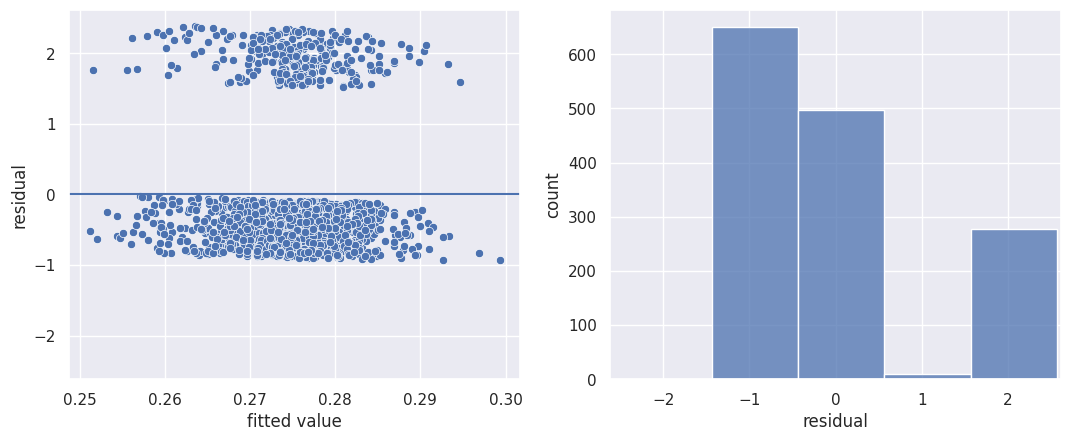

In [32]:
result.plot_residuals()

In [33]:
df_log = df_final.copy()

In [34]:
df_log['usernames_count_log'] = np.log(df_log['usernames_count'])
df_log

,product,usernames_count,coreness,rating_medio,usernames_count_log
0,(New) JBL OnBeat Micro Speaker Dock with Light...,2,0.243892,4.190476,0.693147
1,- Kingston 240GB 2.5-inch 6GB/s HyperX 3K MLC ...,165,0.147251,3.513514,5.105945
2,- Nintendo Wii U,6,0.214005,4.192308,1.791759
3,1 AW1 Waterproof Mirrorless Camera with 11-27....,128,0.156850,2.846154,4.852030
4,1 V2 Mirrorless Camera with 10-30mm VR Lens,2,0.135908,4.428571,0.693147
...,...,...,...,...,...
1428,Xenoblade Chronicles Definitive Edition - Nint...,3,0.004363,2.000000,1.098612
1429,"Yoga 730 2-in-1 15.6"" Touch-Screen Laptop - In...",138,0.012653,4.547619,4.927254
1430,"ZOWIE XL2540K 24.5"" TN LED 240Hz XL Setting to...",2,0.000218,4.000000,0.693147
1431,ZV-1 20.1-Megapixel Digital Camera for Content...,626,0.041885,4.403471,6.439350


In [35]:
result_log_username = reg.linear(data=df_log, formula='coreness ~ rating_medio + usernames_count_log')
result_log_username.micro_summary()

variable,coefficient,std error,p-value
rating_medio,-0.006322,0.014330,0.659183
usernames_count_log,-0.004760,0.004493,0.289657


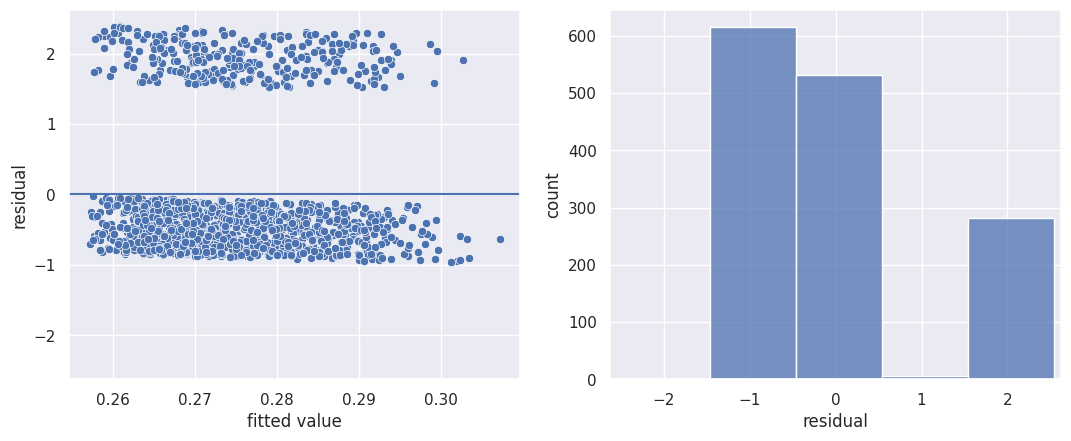

In [36]:
result_log_username.plot_residuals()

In [37]:
df_log_2 = df_log.copy()

In [38]:
df_log_2['rating_medio_log'] = np.log(df_log_2['rating_medio'])

In [39]:
result_log_rating = reg.linear(data=df_log_2, formula='coreness ~ usernames_count_log+ rating_medio_log')
result_log_rating.micro_summary()

variable,coefficient,std error,p-value
usernames_count_log,-0.004766,0.004499,0.289618
rating_medio_log,-0.019985,0.051482,0.697934


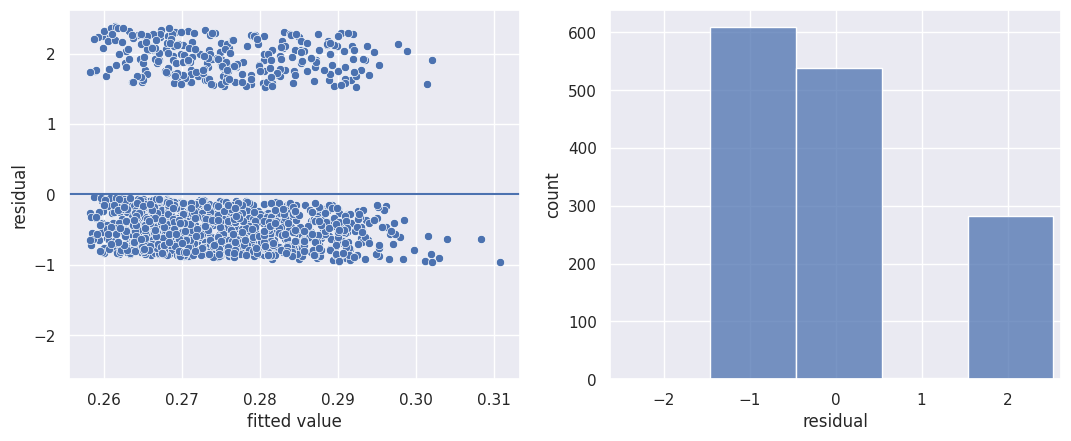

In [40]:
result_log_rating.plot_residuals()

In [41]:
df_log_2

,product,usernames_count,coreness,rating_medio,usernames_count_log,rating_medio_log
0,(New) JBL OnBeat Micro Speaker Dock with Light...,2,0.243892,4.190476,0.693147,1.432814
1,- Kingston 240GB 2.5-inch 6GB/s HyperX 3K MLC ...,165,0.147251,3.513514,5.105945,1.256617
2,- Nintendo Wii U,6,0.214005,4.192308,1.791759,1.433251
3,1 AW1 Waterproof Mirrorless Camera with 11-27....,128,0.156850,2.846154,4.852030,1.045969
4,1 V2 Mirrorless Camera with 10-30mm VR Lens,2,0.135908,4.428571,0.693147,1.488077
...,...,...,...,...,...,...
1428,Xenoblade Chronicles Definitive Edition - Nint...,3,0.004363,2.000000,1.098612,0.693147
1429,"Yoga 730 2-in-1 15.6"" Touch-Screen Laptop - In...",138,0.012653,4.547619,4.927254,1.514604
1430,"ZOWIE XL2540K 24.5"" TN LED 240Hz XL Setting to...",2,0.000218,4.000000,0.693147,1.386294
1431,ZV-1 20.1-Megapixel Digital Camera for Content...,626,0.041885,4.403471,6.439350,1.482393


In [42]:
df_log_2.to_csv('dados_final.csv', index=False)

In [ ]:
produto_coreness = {}

for i, row in df_log_2.iterrows():
    produto_coreness[row['product']] = row['coreness']

In [ ]:
with open('produto_coreness.json', 'w') as f:
    json.dump(produto_coreness, f)

In [ ]:
df_sample

In [ ]:
from itertools import chain
flattened_usernames = list(chain.from_iterable(df_sample['usernames']))
username_counts = Counter(flattened_usernames)

In [ ]:
# Função para filtrar os usuários
def filter_users(usernames):
    return [user for user in usernames if username_counts.get(user, 0) <= 25]

# Aplique a função em cada linha do DataFrame
df_sample['usernames'] = df_sample['usernames'].apply(filter_users)

In [ ]:
# Remova as linhas onde 'usernames' está vazio
df_sample = df_sample[df_sample['usernames'].apply(len) > 0]

In [ ]:
df_sample

In [ ]:
df = df_sample.explode('usernames')
pivot_table = df.groupby(['usernames','product_name']).size().unstack(fill_value=0)
new_df_data = []
for _, row in pivot_table.iterrows():
    reviewed_products = row[row > 0].index.tolist()
    
    for product1, product2 in combinations(reviewed_products, 2):
        new_df_data.append((f"{product1}_{product2}", 1))

new_df = pd.DataFrame(new_df_data, columns=['product_pair', 'weight'])

new_df = new_df.groupby('product_pair').sum().reset_index()

In [ ]:
new_df

In [ ]:
new_df = new_df.loc[new_df['weight'] >= 2]

In [ ]:
new_df

In [54]:
import csv
from collections import defaultdict
from itertools import combinations
from sklearn.preprocessing import LabelEncoder

username_counts = defaultdict(int)

for username, row in pivot_table.iterrows():
    if username in ['Anonymous', 'anonymous', 'ByAmazonCustomer', 'Amazon Customer']:
        continue
    
    reviewed_products = row[row > 0].index.tolist()

    username_counts[username] += len(reviewed_products)

data_dict = defaultdict(list)

for username, row in pivot_table.iterrows():

    reviewed_products = row[row > 0].index.tolist()

    for product1, product2 in combinations(reviewed_products, 2):
        data_dict[(product1, product2)].append(username)

new_df = pd.DataFrame(list(data_dict.items()), columns=['product_pair', 'usernames'])

new_df['weight'] = new_df['usernames'].apply(len)

new_df = new_df[new_df['weight'] >= 2]

product_encoder = LabelEncoder()

all_product_names = set([product for pair in new_df['product_pair'] for product in pair])

product_encoder.fit(list(all_product_names))

with open('edges.txt', 'w', newline='') as f:
    writer = csv.writer(f, delimiter='\t')
    for _, row in new_df.iterrows():
        product1, product2 = row['product_pair']
        encoded_product1 = product_encoder.transform([product1])[0]
        encoded_product2 = product_encoder.transform([product2])[0]
        writer.writerow([encoded_product1, encoded_product2])

In [55]:
new_df

,product_pair,usernames,weight
0,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), Ca...","["" · Review provided by staples.com, DAN · Re...",4
1,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), Ca...","["" · Review provided by staples.com, DAN · Re...",12
3,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), HP...","["" · Review provided by staples.com, JOHN · R...",2
4,"(Canon CLI-281 XXL Black Ink Tank (11.7mL), HP...","["" · Review provided by staples.com, MICHAEL]",2
6,"(Canon CLI-8 Ink Cartridge - Yellow, Canon PGI...","["" · Review provided by staples.com, Christop...",10
...,...,...,...
39015,(Amazfit - GTR Smartwatch 42mm Aluminum - Star...,"[· Review provided by digitec.ch, · Review pr...",2
39031,"(BenQ 27"" Quad HD 2560 x 1440 2K Resolution 14...","[· Review provided by digitec.ch, · Review pr...",2
39038,"(BenQ 27"" Quad HD 2560 x 1440 2K Resolution 14...","[· Review provided by digitec.ch, · Review pr...",2
39050,"(BenQ Monitor Light, LED Computer Monitor Lamp...","[· Review provided by digitec.ch, · Review pr...",2


In [56]:
df_single_product = new_df.explode('product_pair')

In [57]:
df_final = df_single_product.groupby('product_pair')['usernames'].count().reset_index()
df_final.columns = ['product', 'usernames_count']

In [58]:
with open('produto_rating.json', 'r') as f:
    dicionario = json.load(f)

In [59]:
rating_medio_produto = []
for i, row in df_final.iterrows():
    rating_medio_produto.append(dicionario[row['product']])

In [60]:
df_final['rating_medio'] = rating_medio_produto

In [61]:
df_final

,product,usernames_count,rating_medio
0,- Nintendo Wii U,1,4.192308
1,1 AW1 Waterproof Mirrorless Camera with 11-27....,7,2.846154
2,1.2 Cu. Ft. 1200 Watt SN66KB Microwave with In...,13,4.037975
3,"100S-14IBR 14"" Laptop - Intel Celeron - 2GB Me...",95,4.180036
4,1155W 7.2-Ch. with Dolby Atmos 4K Ultra HD HDR...,6,3.987805
...,...,...,...
1022,iPhone 12 Pro Max Silicone Case with MagSafe,4,4.320000
1023,iPhone 12 and iPhone 12 Pro Silicone Case with...,5,3.914894
1024,iPhone XR Case - Clear,6,4.282609
1025,imageCLASS LBP6030w Wireless Black-and-White L...,14,3.892473


In [62]:
df_final['usernames_count_log'] = np.log(df_final['usernames_count'])
df_final['rating_medio_log'] = np.log(df_final['rating_medio'])

In [63]:
df_final

,product,usernames_count,rating_medio,usernames_count_log,rating_medio_log
0,- Nintendo Wii U,1,4.192308,0.000000,1.433251
1,1 AW1 Waterproof Mirrorless Camera with 11-27....,7,2.846154,1.945910,1.045969
2,1.2 Cu. Ft. 1200 Watt SN66KB Microwave with In...,13,4.037975,2.564949,1.395743
3,"100S-14IBR 14"" Laptop - Intel Celeron - 2GB Me...",95,4.180036,4.553877,1.430320
4,1155W 7.2-Ch. with Dolby Atmos 4K Ultra HD HDR...,6,3.987805,1.791759,1.383241
...,...,...,...,...,...
1022,iPhone 12 Pro Max Silicone Case with MagSafe,4,4.320000,1.386294,1.463255
1023,iPhone 12 and iPhone 12 Pro Silicone Case with...,5,3.914894,1.609438,1.364788
1024,iPhone XR Case - Clear,6,4.282609,1.791759,1.454562
1025,imageCLASS LBP6030w Wireless Black-and-White L...,14,3.892473,2.639057,1.359045


In [64]:
with open('produto_coreness.json', 'r') as f:
    coreness_dict = json.load(f)

In [65]:
df_final['coreness'] = df_final['product'].map(coreness_dict)

In [66]:
df_final.dropna()

,product,usernames_count,rating_medio,usernames_count_log,rating_medio_log,coreness
0,- Nintendo Wii U,1,4.192308,0.000000,1.433251,0.214005
1,1 AW1 Waterproof Mirrorless Camera with 11-27....,7,2.846154,1.945910,1.045969,0.156850
2,1.2 Cu. Ft. 1200 Watt SN66KB Microwave with In...,13,4.037975,2.564949,1.395743,0.246946
3,"100S-14IBR 14"" Laptop - Intel Celeron - 2GB Me...",95,4.180036,4.553877,1.430320,0.094459
4,1155W 7.2-Ch. with Dolby Atmos 4K Ultra HD HDR...,6,3.987805,1.791759,1.383241,0.177138
...,...,...,...,...,...,...
1009,WorkForce Pro WF-4820 Wireless All-in-One Printer,1,3.913978,0.000000,1.364554,0.071117
1010,XP700 Portable Bluetooth Party Speaker with Wa...,4,4.980000,1.386294,1.605430,0.014616
1011,XPS Desktop - Intel Core i7 - 16GB Memory - NV...,1,3.500000,0.000000,1.252763,0.011998
1012,"Yoga 730 2-in-1 15.6"" Touch-Screen Laptop - In...",4,4.547619,1.386294,1.514604,0.012653


In [67]:
df_final.to_csv('df_final_recorte_2.csv', index=False)